In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from models import LogisticRegression
from sklearn.metrics import accuracy_score

# https://nextjournal.com/gkoehler/digit-recognition-with-keras

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train = X_train.reshape(60000, 28*28).T
X_test = X_test.reshape(10000, 28*28).T

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes).T
Y_test = np_utils.to_categorical(y_test, n_classes).T
print("Shape after one-hot encoding: ", Y_train.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(784, 60000)
(60000,)
(784, 10000)
(10000,)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (10, 60000)


In [16]:
model = LogisticRegression(input_dim=784, num_classes=10)

y_preds = model.predict(X_test)
print("Initial accuracy: {}".format(accuracy_score(y_test, y_preds)))

model.train(X_train, Y_train, X_test, Y_test, num_epochs=600, minibatch_size=32)

y_preds = model.predict(X_test)
print("Final accuracy: {}".format(accuracy_score(y_test, y_preds)))

Initial accuracy: 0.0874
Loss at epoch 0: 0.942643034477318; Accuracy: 0.805
Loss at epoch 100: 0.05841388056885278; Accuracy: 0.9207
Loss at epoch 200: 0.05202741898710912; Accuracy: 0.9225
Loss at epoch 300: 0.053661890562218276; Accuracy: 0.9229
Loss at epoch 400: 0.0558507285141453; Accuracy: 0.9231
Loss at epoch 500: 0.057694414324285834; Accuracy: 0.9221
Final accuracy: 0.9221


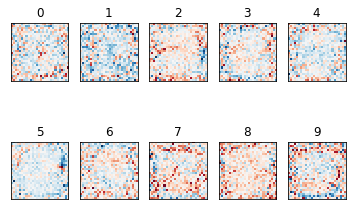

In [17]:
# https://stats.stackexchange.com/questions/426873/how-does-a-simple-logistic-regression-model-achieve-a-92-classification-accurac
weights = model.W
# plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i, :].reshape([28,28])
    plt.title(i)
    plt.imshow(weight, cmap='RdBu')  # as noted by @Eric Duminil, cmap='gray' makes the numbers stand out more
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)